# Шта чини еколошки отисак?
У претходним лекцијама објаснили смо значење термина еколошки отисак, као и неке показатеље на основу којих можемо да закључимо које државе троше више ресурса него што их имају на располагању. У ствари, тачнија формулација би била „него што их имамо на располагању“ јер сви трошимо заједничке, укупне капацитете планете Земље. Сада ћемо се мало детаљније позабавити структуром еколошког отиска. Сâма чињеница да смо често користили термин „укупни“, говори нам да је еколошки отисак заправо збир више елемената који се односе на потребе становника за различитим врстама ресурса.

За почетак ћемо учитати скуп података који смо уредили у првој лекцији, након чега ћемо излистати варијабле које у свом називу имају термин *footprint*.   

In [6]:
import pandas as pd

otisak = pd.read_csv('podaci/NFA 2021 v2.csv')

# Правимо низ колона које имају 'Footrpint' у називу
ftKol = [kol for kol in otisak.columns if 'Footprint' in kol] 

otisak[ftKol].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Cropland Footprint          158 non-null    float64
 1   Grazing Footprint           158 non-null    float64
 2   Forest Footprint            158 non-null    float64
 3   Carbon Footprint            158 non-null    float64
 4   Fish Footprint              158 non-null    float64
 5   Total Ecological Footprint  184 non-null    float64
dtypes: float64(6)
memory usage: 8.8 KB


На основу листе варијабли може се закључити да укупни еколошки отисак заправо чини пет компонената. Оне се тичу потреба за различитим природним ресурсима, како оним за производњу хране, тако и за апсорпцију штетних материја које човек производи. Пет компонената еколошког отиска односе се на утицај који човек, заједница или држава имају на оранице (енгл. *cropland*), пашњаке (енгл. *grazing*), шуме (енгл. *forest*), емисију гасова стаклене баште (енгл. *carbon*) и рибљи потенцијал (енгл. *fish*). У медијима се најчешће указује на важност *карбонског (угљеничног) отиска*, али очигледно је да емисија штетних гасова представља само једну компоненту укупног еколошког отиска.

Приказаћемо дистрибуције појединачних компоненти на засебним графиконима, а затим и све заједно на истом графикону уз вредности укупног еколошког отиска.

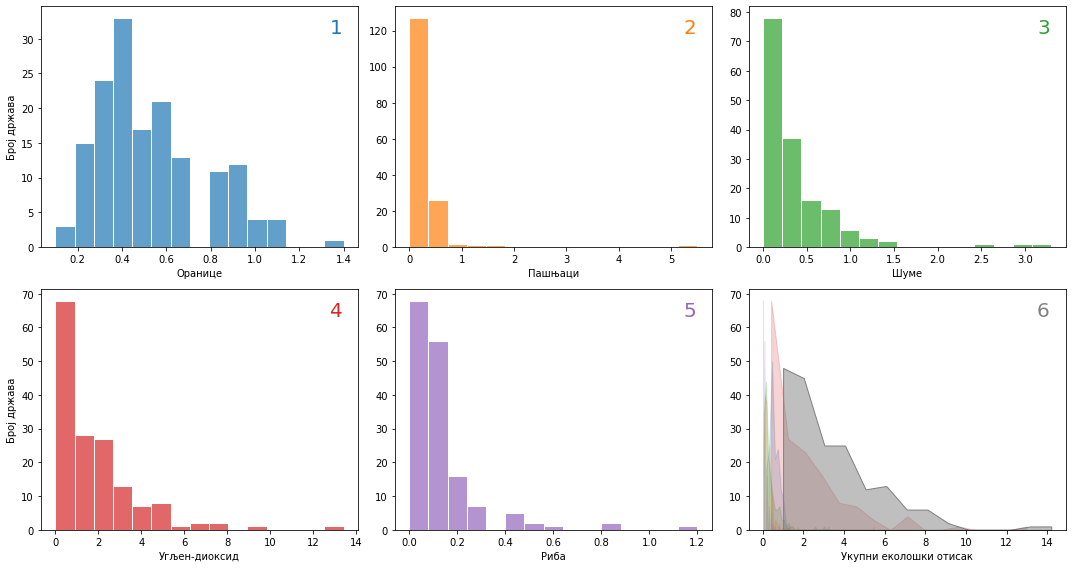

In [10]:
import matplotlib.pyplot as plt
import seaborn as sbrn

# Правимо мрежу графикона 2 x 3
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(15,8))

# За боје ћемо искористити matplotlib палету tab10
boje = plt.get_cmap('tab10')

# Додељујемо називе x-оса
naziviX = ['Оранице', 'Пашњаци', 'Шуме', 'Угљен-диоксид', 'Риба', 'Укупни еколошки отисак']
# Само први графикони у сваком реду имају називе y-оса
naziviY = ['Број држава', '', '', 'Број држава', '', ''] 

# Да не бисмо понаваљали код за сваки графикон користићемо for петљу
for rb, ax in enumerate(fig.axes[:-1]):
    # Исцртавамо стубичасти дијаграм са 15 стубића за сваку компоненту отиска
    sbrn.histplot(otisak[ftKol], x=ftKol[rb], alpha=0.7, ax=ax, color=boje(rb), bins=15, edgecolor='white')
    
    boja = list(boje(rb))   # Овде се играмо и мењамо провидност (alpha) ниво тренутне боје у низу boje(rb)
    boja[3] = 0.2           # Боје се изражвају као tuple објекат са четири елемента (RGBA):
    bordura = tuple(boja)   # R - црвена, G - зелена, B - плава, A - провидност
    
    # Исте податке представљамо полигоном фреквенција (елемент='полy') на последњем графикону
    sbrn.histplot(otisak[ftKol], x=ftKol[rb], alpha=0.2, element='poly', ax=ax6, color=boje(rb), edgecolor=bordura) 
    
    # Постављамо називе оса
    ax.set_xlabel(naziviX[rb])
    ax.set_ylabel(naziviY[rb])

    # Уписујемо редни број графикона у горњи десни угао
    ax.text(0.95, 0.95, rb+1, transform=ax.transAxes, fontsize=20, color=boje(rb), ha='right', va='top')

# На последњи графикон додајемо још и дистрибуцију укупног отиска
sbrn.histplot(otisak[ftKol], x=ftKol[5], alpha=0.5, element='poly', ax=ax6, color='gray')
ax6.text(0.95, 0.95, '6', transform=ax6.transAxes, fontsize=20, color='gray', ha='right', va='top')
ax6.set_xlabel('Укупни еколошки отисак')
ax6.set_ylabel('')

# Овим мало сабијамо простор између "кућица"
plt.tight_layout() 

За почетак обратите пажњу да вредности на x- и y-осама графикона нису једнаке. Због тога апсолутно поређење графикона није потпуно оправдано. На пример, можда вам делује да трећи и четврти графикон имају сличне распоне и дистрибуције, али након увида у вредности x-оса види се да је распон карбонског отиска чак четири пута већи. Исто важи и за поређење вредности на y-осама. Релативни однос дистрибуција и њихово поређење оправдано је само на шестом графикону, али на њему је много теже уочити распоне појединачних компоненти због великих разлика у распонима.

На основу изгледа дистрибуција на шестом графикону можемо да закључимо и да је карбонски отисак (црвени полигон) кључна компонента укупног еколошког отиска (сиви полигон). Вероватно ћете због тога једино за карбонски отисак успети да повучете аналогију између стубичастог дијаграма на графикону 4 и црвеног полигона фреквенција на графикону 6. Остали полигони имају толико мале распоне у поређењу са укупним вредностима да се појављују као уски „шпицеви“ у левом крају x-осе.

Обратите пажњу да су све дистрибуције мање или више позитивно искошене. То нам указује да је већина земаља груписана у зонама ниског отиска, а да релативно мали број држава веома одудара од типичних вредности. Ова аберантност је најуочљивија на другом, трећем и петом графикону. Наравно, треба напоменути да високе вредности отиска не значе нужно да је држава у еколошком дефициту, јер су то можда државе које имају и велики природни потенцијал.

<div class="alert alert-block alert-info"><img src="slike/zad.png" align="left"/>Покушајте самостално да одаберете по пет држава које имају највеће вредности на свакој варијабли. Препоручујемо да употребите функције <b>sort_values()</b>, <b>head()</b> и <b>concat()</b> и да потражите њихове описе на интернету. Ако се не снађете, искористите код из датотеке <a href='podaci/ekotop5.txt' target='_blank'>ekotop5.txt</a>.</div> 

**Шта чини еколошки отисак?**

Видели смо да је еколошки отисак вишедимензионалан појам. Иако се у медијима углавном говори о угљеничном отиску, то је само једна од компонената укупног еколошког отиска неке заједнице или државе. Истина, карбонски отисак највише доприноси укупном еколошком отиску и због тога представља горући еколошки проблем за становнике планете Земље.